In [2]:
import pandas as pd
%matplotlib inline

# Baby Names in Moers

https://www.offenesdatenportal.de/organization/moers

Search for 'Vornamen'
We saved the .csv files for you in 'data/' 

## Make a pandas data frame from csv
Let's look at the csv-files: 

In [3]:
# make a data frame from csv 
df17 = pd.read_csv('data/vornamen-2017.csv')

In [4]:
# If the data frame is quite large, it can take a while to print the whole thing out. 
# If you use 'df.head()' you will get only the top five rows 
df17.head()

,anzahl;vorname;geschlecht;position
0,29;Sophie;w;2
1,27;Marie;w;2
2,27;Ben;m;1
3,23;Mila;w;1
4,23;Paul;m;1


Whoops, what happened? 
In this case our csv is not comma separated. Instead the csv uses a semicolon as seperator: ;. 
Don't worry, you can specify the separator manually: 'sep=';'. 

In [5]:
df17 = pd.read_csv('data/vornamen2015.csv', sep=';')
df17.head()

,anzahl,vorname,geschlecht
0,48,Sophie,w
1,46,Marie,w
2,29,Mia,w
3,24,Elias,m
4,22,Charlotte,w


In [6]:
# 'df.tail()' gives you the last five rows
df17.tail()

,anzahl,vorname,geschlecht
1283,1,Zineddine,m
1284,1,Zübeyr,m
1285,1,Étienne,m
1286,1,Şeran,m
1287,1,Şeyhmus,m


As you can see special characters are shown correctly. This is because pandas uses the encoding 'utf-8' as a standard and the data is using this encoding, too. 
If your not that lucky and your special characters start to look weird, you have to find out which encoding was used in the data file. Sometimes the data yource is nice and tells you what encoding they used, ift not you have to find out by trial and error. 
You can specify which encoding pandas uses by adding for example 'encoding='latin-1' or 'encoding='iso- 5589-1'.

In [7]:
df17 = pd.read_csv('data/vornamen-2017.csv', sep=';', encoding='utf-8')
df17[15:20]

,anzahl,vorname,geschlecht,position
15,15,Emily,w,1
16,15,Hannah,w,1
17,14,Tom,m,1
18,13,Maria,w,2
19,13,Lena,w,1


## You do it 
- Read vornamen2018.csv into a pandas data frame 
- look at head and tail of your data 

In [8]:
df18 = pd.read_csv('data/vornamen-2018.csv', sep=';')

## Filtering

In [9]:
# First names > filter by 'position'
df17top = df17[df17['position']==1]
df17top.head()

,anzahl,vorname,geschlecht,position
2,27,Ben,m,1
3,23,Mila,w,1
4,23,Paul,m,1
5,21,Felix,m,1
7,20,Emilia,w,1


In [10]:
# Only girls and only the top 20 
df17topgirls = df17top[df17top['geschlecht'] == 'w'].head(20)
df17topgirls

,anzahl,vorname,geschlecht,position
3,23,Mila,w,1
7,20,Emilia,w,1
8,20,Mia,w,1
10,17,Emma,w,1
12,17,Lina,w,1
15,15,Emily,w,1
16,15,Hannah,w,1
19,13,Lena,w,1
21,12,Amelie,w,1
22,12,Leonie,w,1


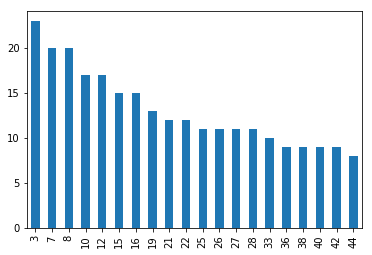

In [11]:
df17topgirls.anzahl.plot(kind='bar')

In [12]:
df17topgirls = df17topgirls.set_index('vorname')
df17topgirls 

,anzahl,geschlecht,position
vorname,,,
Mila,23,w,1
Emilia,20,w,1
Mia,20,w,1
Emma,17,w,1
Lina,17,w,1
Emily,15,w,1
Hannah,15,w,1
Lena,13,w,1
Amelie,12,w,1


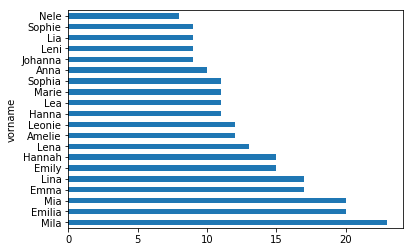

In [13]:
df17topgirls.anzahl.plot(kind='barh')

In [14]:
df17topgirls = df17topgirls.sort_values('anzahl', ascending=True)

In [15]:
df17topgirls

,anzahl,geschlecht,position
vorname,,,
Nele,8,w,1
Lia,9,w,1
Leni,9,w,1
Johanna,9,w,1
Sophie,9,w,1
Anna,10,w,1
Sophia,11,w,1
Marie,11,w,1
Lea,11,w,1


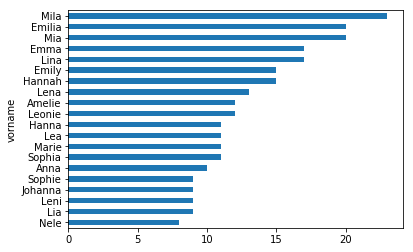

In [16]:
df17topgirls.anzahl.plot.barh()

  ## You do it 

- Filter df16 to only boys names that were given more than 20 times 
- Plot the top16boys as a horizontal bar chart in descending order

In [17]:
df17boys = 

SyntaxError: invalid syntax (<ipython-input-17-6c417923ce79>, line 1)

# Combine two dfs into one 

If we want to combine the two data files, it can be handy to add a new colum 'jahr' to each of them first.
And it will be usefull later to have a column for the ranking of a name. As the names already are in descending order from the top to the uncommon names, we can use the index + 1, because we like to start to count from 1. 

In [18]:
df_concat17 = df17
df_concat17['jahr'] = '2017' 
df_concat17['rang'] = df_concat17.index+1
df_concat17.head()

,anzahl,vorname,geschlecht,position,jahr,rang
0,29,Sophie,w,2,2017,1
1,27,Marie,w,2,2017,2
2,27,Ben,m,1,2017,3
3,23,Mila,w,1,2017,4
4,23,Paul,m,1,2017,5


## You do it 
Make the column 'jahr' for 2018 and make the columns 'rang'.

In [19]:
df_concat18 = df18
df_concat18['jahr'] = '2018' 
df_concat18['rang'] = df_concat18.index+1
df_concat18.head()



,anzahl,vorname,geschlecht,position,jahr,rang
0,29,Marie,w,2,2018,1
1,25,Mila,w,1,2018,2
2,24,Sophie,w,2,2018,3
3,21,Paul,m,1,2018,4
4,20,Emma,w,1,2018,5


### First way: Concat 
There are a lot of possibilities to combine two dataframes. You can merge and join them based on parameters you can define. First we will use the most simple way and just glue the two dataframes together, one under the other. 
To be able to prove that all went well, we look at the dimensions of the data frames first. 

In [20]:
# df.shape shows you how many rows and columns are in your data frame. 
df_concat17.shape

(1698, 6)

## You do it 
Show how many rows and columns are in df18

In [21]:
df_concat18.shape

(1674, 6)

## Concat the two data frames

In [22]:
# make a list of our two data frames 
dfs = [df_concat17, df_concat18]

# concat them 
names = pd.concat(dfs)

In [23]:
names.shape 

(3372, 6)

## You do it 
Use a jupyter notebook cell as a calculator to prove that all rows and columns that you expect are in your new names df 

In [24]:
1698+1674

3372

## More baby names fun

In [25]:
name = input('Please insert your name: ')
Mein_Name = names[(names['vorname'] == name)]
Mein_Name

Please insert your name: 


,anzahl,vorname,geschlecht,position,jahr,rang


In [26]:
top_namen = names[names['rang'] <10]

In [27]:
top_namen

,anzahl,vorname,geschlecht,position,jahr,rang
0,29,Sophie,w,2,2017,1
1,27,Marie,w,2,2017,2
2,27,Ben,m,1,2017,3
3,23,Mila,w,1,2017,4
4,23,Paul,m,1,2017,5
5,21,Felix,m,1,2017,6
6,20,Alexander,m,2,2017,7
7,20,Emilia,w,1,2017,8
8,20,Mia,w,1,2017,9
0,29,Marie,w,2,2018,1


In [28]:
namen1 = top_namen.pivot_table(values='anzahl', index='jahr', columns='vorname', aggfunc=sum)
namen1

vorname,Alexander,Ben,Elias,Ella,Emilia,Emma,Felix,Marie,Mia,Mila,Paul,Sophie
jahr,,,,,,,,,,,,
2017,20.0,27.0,NaN,NaN,20.0,NaN,21.0,27.0,20.0,23.0,23.0,29.0
2018,NaN,NaN,16.0,18.0,17.0,20.0,18.0,29.0,NaN,25.0,21.0,24.0


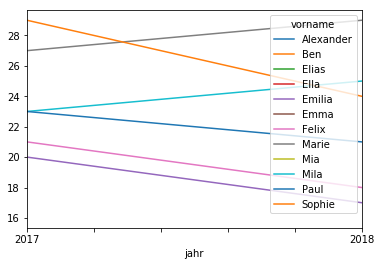

In [29]:
namen1.plot()

# What was the most popular name 2017 and 2018? 

In [30]:
# Now our names data frame starts with the most used names in 2017 and ends with the uncommon names from 2018.
names.head()

,anzahl,vorname,geschlecht,position,jahr,rang
0,29,Sophie,w,2,2017,1
1,27,Marie,w,2,2017,2
2,27,Ben,m,1,2017,3
3,23,Mila,w,1,2017,4
4,23,Paul,m,1,2017,5


If you want to know what was the most popular name in 2015 and 2016, you try to sort by value 'anzahl' ...  

In [31]:
names.sort_values('anzahl', ascending=False).head(10)

,anzahl,vorname,geschlecht,position,jahr,rang
0,29,Sophie,w,2,2017,1
0,29,Marie,w,2,2018,1
1,27,Marie,w,2,2017,2
2,27,Ben,m,1,2017,3
1,25,Mila,w,1,2018,2
2,24,Sophie,w,2,2018,3
4,23,Paul,m,1,2017,5
3,23,Mila,w,1,2017,4
5,21,Felix,m,1,2017,6
3,21,Paul,m,1,2018,4


## Merging data frames 
In this case it would be better two have two columns: one for 'anzahl_2015' and one for 'anzahl_2016'. Then jou can add both.  
Maybe it's a better option to merge the two dfs instead of concatenating them. 

In [32]:
df17.head()

,anzahl,vorname,geschlecht,position,jahr,rang
0,29,Sophie,w,2,2017,1
1,27,Marie,w,2,2017,2
2,27,Ben,m,1,2017,3
3,23,Mila,w,1,2017,4
4,23,Paul,m,1,2017,5


In [33]:
names_combined = pd.merge(df17, df18, how='left', on=['vorname', 'geschlecht', 'position'])

In [34]:
names_combined.head()

,anzahl_x,vorname,geschlecht,position,jahr_x,rang_x,anzahl_y,jahr_y,rang_y
0,29,Sophie,w,2,2017,1,24.0,2018,3.0
1,27,Marie,w,2,2017,2,29.0,2018,1.0
2,27,Ben,m,1,2017,3,14.0,2018,12.0
3,23,Mila,w,1,2017,4,25.0,2018,2.0
4,23,Paul,m,1,2017,5,21.0,2018,4.0


In [35]:
names_combined['anzahl'] = names_combined['anzahl_x'] + names_combined['anzahl_y']

In [36]:
names_combined.sort_values('anzahl', ascending=False).head(10)

,anzahl_x,vorname,geschlecht,position,jahr_x,rang_x,anzahl_y,jahr_y,rang_y,anzahl
1,27,Marie,w,2,2017,2,29.0,2018,1.0,56.0
0,29,Sophie,w,2,2017,1,24.0,2018,3.0,53.0
3,23,Mila,w,1,2017,4,25.0,2018,2.0,48.0
4,23,Paul,m,1,2017,5,21.0,2018,4.0,44.0
2,27,Ben,m,1,2017,3,14.0,2018,12.0,41.0
5,21,Felix,m,1,2017,6,18.0,2018,6.0,39.0
10,17,Emma,w,1,2017,11,20.0,2018,5.0,37.0
7,20,Emilia,w,1,2017,8,17.0,2018,8.0,37.0
11,17,Elias,m,1,2017,12,16.0,2018,9.0,33.0
9,20,Maximilian,m,1,2017,10,11.0,2018,29.0,31.0


In [37]:
names_top = names_combined[['vorname', 'geschlecht', 'anzahl']]

In [43]:
names_top = names_top.head(10)
names_top = names_top.sort_values('anzahl', ascending=False)

In [44]:
names_top = names_top.set_index('vorname')

KeyError: 'vorname'

## YES! 

In [47]:
names_top.to_csv('data/top_names_17_18.csv')